# Packages, Dataset

In [4]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Upload BRCA1 variants
#BRCA1 variants were obtained from searching "BRCA1" in NIH's ClinVar
from google.colab import files
uploaded = files.upload()

Saving BRCA1_mutations_clinvar.txt to BRCA1_mutations_clinvar.txt


In [5]:
#Read in BRCA1 mutation data
data = pd.read_csv('BRCA1_mutations_clinvar.txt', sep = '\t')
BRCA1_df = pd.DataFrame(data)
BRCA1_df.head()

,Name,Gene(s),Protein change,Condition(s),Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,...,Germline classification,Germline date last evaluated,Germline review status,Somatic clinical impact,Somatic clinical impact date last evaluated,Somatic clinical impact review status,Oncogenicity classification,Oncogenicity date last evaluated,Oncogenicity review status,Unnamed: 24
0,GRCh38/hg38 17q23.1-25.1(chr17:36449220-750531...,LOC125316770|LOC125316771|LOC125316772|LOC1253...,NaN,See cases,VCV000148363,17,57595736 - 73049225,17,36449220 - 75053130,148363,...,Pathogenic,"Apr 21, 2011",no assertion criteria provided,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GRCh38/hg38 17q21.33-24.2(chr17:36449220-68170...,LOC125177502|LOC125177503|LOC125177504|LOC1251...,NaN,See cases,VCV000057282,17,48563237 - 65936105,17,36449220 - 68170214,57282,...,Pathogenic,"Aug 12, 2011","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GRCh38/hg38 17q12-21.31(chr17:39199873-4562957...,LOC130060788|LOC130060789|LOC130060790|LOC1300...,NaN,See cases,VCV000058696,17,37356126 - 43706945,17,39199873 - 45629579,58696,...,Pathogenic,"Aug 12, 2011","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NG_005905.2:g.(?_92501)_(135581_1441370)del(;)...,LOC126862571|LOC130060934|RND2|LOC110485084|LO...,NaN,"Breast-ovarian cancer, familial, susceptibilit...",VCV000373888,17|17,41176312 - 41277500,17|17,43024295 - 43125483,373888,...,Pathogenic,"Oct 2, 2015","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NG_005905.2:g.(?_92501)_(135581_1441370)del,LOC126862571|LOC130060934|RND2|BRCA1|LOC110485...,NaN,"Breast-ovarian cancer, familial, susceptibilit...",VCV000373863,17,41176312 - 41277500,17,43024295 - 43125483,373863,...,Pathogenic,"Oct 2, 2015","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [6]:
#EDA
BRCA1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15451 entries, 0 to 15450
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Name                                         15451 non-null  object 
 1   Gene(s)                                      15451 non-null  object 
 2   Protein change                               9404 non-null   object 
 3   Condition(s)                                 15448 non-null  object 
 4   Accession                                    15451 non-null  object 
 5   GRCh37Chromosome                             15250 non-null  object 
 6   GRCh37Location                               15250 non-null  object 
 7   GRCh38Chromosome                             14962 non-null  object 
 8   GRCh38Location                               14962 non-null  object 
 9   VariationID                                  15451 non-null  int64  
 10

In [7]:
#EDA
BRCA1_df['Variant type'].value_counts()

,count
Variant type,
single nucleotide variant,11220
Deletion,2464
Duplication,840
Insertion,389
Indel,269
Microsatellite,196
protein only,31
copy number gain,17
Variation,10


In [8]:
#Check to see that all observations are the BRCA1 gene
BRCA1_df['Gene(s)'].value_counts()

,count
Gene(s),
BRCA1,13546
BRCA1|LOC126862571,1535
LOC126862571|BRCA1,169
BRCA1|LOC111589215,81
BRCA1|LOC110485084|LOC111589215|LOC111589216|LOC126862571,15
BRCA1|LOC110485084|LOC111589216,13
BRCA1|LOC110485084|LOC111589215|LOC111589216,12
BRCA1|LOC110485084|LOC111589216|LOC126862571,11
BRCA1|NBR2,10


In [9]:
#Determine what proportion of the variants are benign/pathogenic
BRCA1_df['Germline classification'].value_counts()

,count
Germline classification,
Pathogenic,4032
Conflicting classifications of pathogenicity,2875
Likely benign,2700
Uncertain significance,2377
not provided,2133
Benign,736
Likely pathogenic,286
Pathogenic/Likely pathogenic,215
Benign/Likely benign,88


# Analysis I: Visualizing last evaluation date for variants of unknown significance

In [10]:
#Filter out the variants with established pathogenicity for variants of unknown significance
VUS_df = BRCA1_df[(BRCA1_df['Germline classification']=='not provided') | (BRCA1_df['Germline classification']=='Conflicting classifications of pathogenicity') | (BRCA1_df['Germline classification']=='Uncertain significance') | (BRCA1_df['Germline classification']=='no classification for the single variant') | (BRCA1_df['Germline classification']=='no classifications from unflagged records')]
VUS_df.head()

,Name,Gene(s),Protein change,Condition(s),Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,...,Germline classification,Germline date last evaluated,Germline review status,Somatic clinical impact,Somatic clinical impact date last evaluated,Somatic clinical impact review status,Oncogenicity classification,Oncogenicity date last evaluated,Oncogenicity review status,Unnamed: 24
26,NM_007294.4(BRCA1):c.*1363A>T,BRCA1,NaN,not specified,VCV000438907,17,41196332,17,43044315,438907,...,Uncertain significance,"Jan 20, 2017","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NM_007294.4(BRCA1):c.*1358A>G,BRCA1,NaN,not specified,VCV001336623,17,41196337,17,43044320,1336623,...,Uncertain significance,"Mar 27, 2018","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NM_007294.4(BRCA1):c.*1337TGT[1],BRCA1,NaN,Hereditary breast ovarian cancer syndrome|not ...,VCV001194910,17,41196353 - 41196355,17,43044336 - 43044338,1194910,...,Uncertain significance,"Jul 20, 2025","criteria provided, multiple submitters, no con...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NM_007294.4(BRCA1):c.*1336A>G,BRCA1,NaN,not specified,VCV001336422,17,41196359,17,43044342,1336422,...,Uncertain significance,"Mar 6, 2018","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NM_007294.4(BRCA1):c.*1323A>G,BRCA1,NaN,Hereditary breast ovarian cancer syndrome,VCV000323408,17,41196372,17,43044355,323408,...,Uncertain significance,"Jun 14, 2016","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Change germline date last evaluted to only have year for simplification
VUS_df['Germline year last evaluated'] = VUS_df['Germline date last evaluated'].str[-4:]
VUS_df = VUS_df.dropna(subset=['Germline date last evaluated', 'Germline year last evaluated'])
VUS_df['Germline year last evaluated'] = VUS_df['Germline year last evaluated'].astype(int)
VUS_df.head()

/tmp/ipython-input-1453453536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VUS_df['Germline year last evaluated'] = VUS_df['Germline date last evaluated'].str[-4:]


,Name,Gene(s),Protein change,Condition(s),Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,...,Germline date last evaluated,Germline review status,Somatic clinical impact,Somatic clinical impact date last evaluated,Somatic clinical impact review status,Oncogenicity classification,Oncogenicity date last evaluated,Oncogenicity review status,Unnamed: 24,Germline year last evaluated
26,NM_007294.4(BRCA1):c.*1363A>T,BRCA1,NaN,not specified,VCV000438907,17,41196332,17,43044315,438907,...,"Jan 20, 2017","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
27,NM_007294.4(BRCA1):c.*1358A>G,BRCA1,NaN,not specified,VCV001336623,17,41196337,17,43044320,1336623,...,"Mar 27, 2018","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
28,NM_007294.4(BRCA1):c.*1337TGT[1],BRCA1,NaN,Hereditary breast ovarian cancer syndrome|not ...,VCV001194910,17,41196353 - 41196355,17,43044336 - 43044338,1194910,...,"Jul 20, 2025","criteria provided, multiple submitters, no con...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025
29,NM_007294.4(BRCA1):c.*1336A>G,BRCA1,NaN,not specified,VCV001336422,17,41196359,17,43044342,1336422,...,"Mar 6, 2018","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
32,NM_007294.4(BRCA1):c.*1323A>G,BRCA1,NaN,Hereditary breast ovarian cancer syndrome,VCV000323408,17,41196372,17,43044355,323408,...,"Jun 14, 2016","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016


In [12]:
#EDA
VUS_df['Germline year last evaluated'].value_counts()

,count
Germline year last evaluated,
2024,1774
2023,1653
2025,828
2022,239
2021,161
2019,145
2020,115
2018,73
2016,57


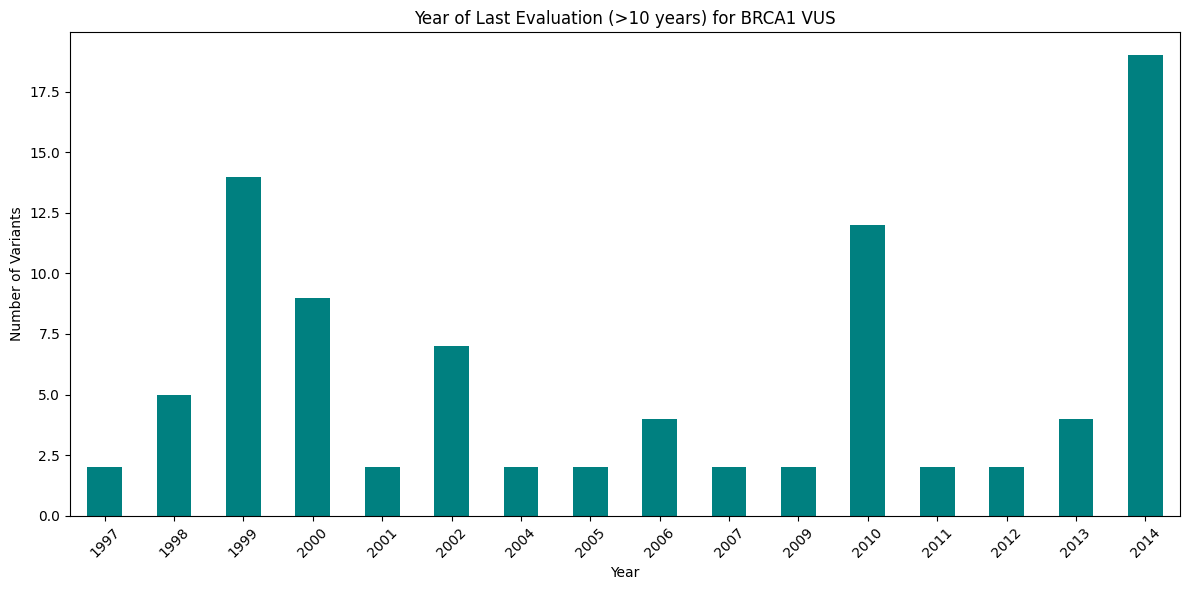

In [13]:
#Plotting the last evaluated years for VUS that were evaluated more than ten years ago

import matplotlib.pyplot as plt

# Group by year
old_VUS_df = VUS_df[VUS_df['Germline year last evaluated'] < 2015]
VUS_by_year = old_VUS_df['Germline year last evaluated'].value_counts().sort_index()

# Plot
VUS_by_year.plot(kind='bar', figsize=(12,6), color='teal')
plt.title("Year of Last Evaluation (>10 years) for BRCA1 VUS")
plt.xlabel("Year")
plt.ylabel("Number of Variants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analysis II: Identifying variants of unknown significance that are likely benign

In [14]:
#EDA: Of the VUS, what are their molecular consequences? Are any less likely to create issues?
old_VUS_df['Molecular consequence'].value_counts()

,count
Molecular consequence,
intron variant,31
missense variant|non-coding transcript variant,15
inframe_deletion|intron variant|inframe_indel,2
inframe_deletion|intron variant,2
splice acceptor variant,2
splice acceptor variant|intron variant,1
splice acceptor variant|splice donor variant|intron variant,1
3 prime UTR variant|non-coding transcript variant,1
inframe_deletion|inframe_indel|intron variant,1


In [15]:
#Create a new dataframe with only variants that have not been re-evaluated recently, all are intron variants (likely insignificant), and each have a dbSNP
#These variants are likely benign and should be re-evaluated
likely_benign_df = old_VUS_df[(old_VUS_df['Molecular consequence']=='intron variant')]
likely_benign_df = likely_benign_df.dropna(subset=['dbSNP ID'])
selected_cols = likely_benign_df[['dbSNP ID','Germline year last evaluated', 'GRCh38Location']]
print(selected_cols)

           dbSNP ID  Germline year last evaluated       GRCh38Location
1522    rs273901763                          1998             43050985
1524     rs80358190                          1999             43051032
1926    rs273901758                          1999             43056975
1927    rs273901758                          2005             43056975
1928    rs273901757                          2002  43056991 - 43056992
1931    rs273901756                          2006  43057003 - 43057004
2399    rs273901749                          2010             43063232
2459    rs273901750                          1999             43063320
2491   rs1567768553                          1998             43063329
2759    rs273901747                          1999             43063415
2761    rs273901748                          1999             43063439
3631   rs1555580027                          2010  43068193 - 43068275
4443    rs273900738                          2010             43074300
4826  

# Analysis III: Exploring differences in last evaluation dates by pathogenicity of variants

In [16]:
#Making new column for simplified germline classification (pathogenic, benign, or unknown)
simp_df = BRCA1_df.dropna(subset=['Germline classification'])

conditions = [
    simp_df['Germline classification'].isin([
        'Conflicting classifications of pathogenicity',
        'not provided',
        'Uncertain significance',
        'no classification for the single variant',
        'no classifications from unflagged records'
    ]),
    simp_df['Germline classification'].isin([
        'Pathogenic', 'Pathogenic/Likely pathogenic', 'Likely pathogenic'
    ])
]
choices = ['unknown', 'pathogenic']
simp_df['Simp classification'] = np.select(conditions, choices, default='benign')
simp_df['Simp classification'].value_counts()

/tmp/ipython-input-1727472608.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simp_df['Simp classification'] = np.select(conditions, choices, default='benign')


,count
Simp classification,
unknown,7389
pathogenic,4533
benign,3524


In [17]:
#Change germline date last evaluted to only have year for simplification
simp_df['Germline year last evaluated'] = simp_df['Germline date last evaluated'].str[-4:]
simp_df = simp_df.dropna(subset=['Germline date last evaluated', 'Germline year last evaluated'])
simp_df['Germline year last evaluated'] = simp_df['Germline year last evaluated'].astype(int)

/tmp/ipython-input-2930700179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simp_df['Germline year last evaluated'] = simp_df['Germline date last evaluated'].str[-4:]


In [18]:
#Calculate mean germline evaluation year for pathogenic variants
pathogenic_obs = simp_df[simp_df['Simp classification'] == 'pathogenic']
print(pathogenic_obs['Germline year last evaluated'].mean())

2018.386944818304


In [19]:
#Repeat for VUS
VUS_obs = simp_df[simp_df['Simp classification'] == 'unknown']
print(VUS_obs['Germline year last evaluated'].mean())

2022.848519800077


In [20]:
#Repeat for benign variants
benign_obs = simp_df[simp_df['Simp classification'] == 'benign']
print(benign_obs['Germline year last evaluated'].mean())

2020.0002853881278


<Figure size 1400x600 with 0 Axes>

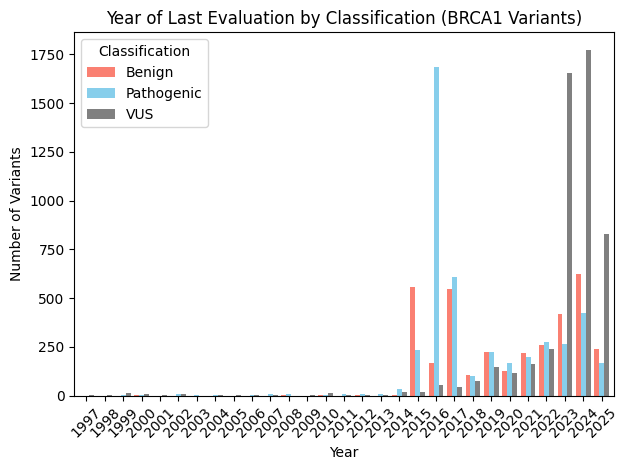

In [21]:
#Plot bar charts for the year of last evaluation for pathogenic variants, benign variants, and VUS
benign_years = benign_obs['Germline year last evaluated'].value_counts().sort_index()
pathogenic_years = pathogenic_obs['Germline year last evaluated'].value_counts().sort_index()
vus_years = VUS_obs['Germline year last evaluated'].value_counts().sort_index()

# Combine into a single DataFrame
year_df = pd.DataFrame({
    'Benign': benign_years,
    'Pathogenic': pathogenic_years,
    'VUS': vus_years
}).fillna(0)  # Fill missing years with 0

# Sort by year
year_df = year_df.sort_index()

# Plot
plt.figure(figsize=(14, 6))
year_df.plot(kind='bar', color=['salmon', 'skyblue', 'gray'], width=0.8)
plt.title("Year of Last Evaluation by Classification (BRCA1 Variants)")
plt.xlabel("Year")
plt.ylabel("Number of Variants")
plt.xticks(rotation=45)
plt.legend(title="Classification")
plt.tight_layout()
plt.show()

# Analysis IV: Identifying a clustered chromosomal region of BRCA1 variants

In [22]:
#Create a function to get a standard GRCH38 location since some are formatted differently

def parse_location(loc):
    if pd.isna(loc):
        return None
    #If there is a range of locations, take the average location
    if isinstance(loc, str) and '-' in loc:
        parts = loc.split('-')
        try:
            start = int(parts[0].strip())
            end = int(parts[1].strip())
            return (start + end) / 2
        except:
            return None
    try:
        return float(loc)
    except:
        return None

# Apply to column
simp_df['Cleaned GRCh38 Location'] = simp_df['GRCh38Location'].apply(parse_location)

In [23]:
#Futher cleaning
simp_df = simp_df.dropna(subset=['Cleaned GRCh38 Location'])

Text(0.5, 1.0, 'Distribution of BRCA1 variants GRCH38 location by germline classification')

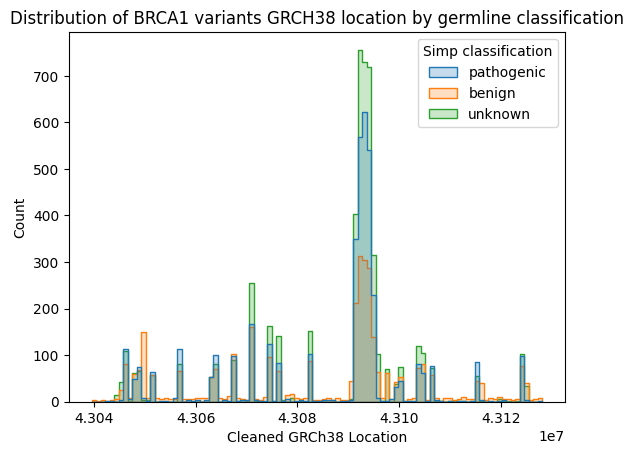

In [29]:
# Make sure column is numeric
simp_df['Cleaned GRCh38 Location'] = pd.to_numeric(simp_df['Cleaned GRCh38 Location'], errors='coerce')

# Filter to known BRCA1 region (rough bounds)
simp_df = simp_df[(simp_df['Cleaned GRCh38 Location'] > 4.3e7) & (simp_df['Cleaned GRCh38 Location'] < 4.32e7)]

#Visualizing location of BRCA1 variants by germline classification

ax = sns.histplot(
    data=simp_df[simp_df['Simp classification'].isin(['pathogenic', 'benign', 'unknown'])],
    x='Cleaned GRCh38 Location', hue='Simp classification',
    bins=100, element='step', common_norm=False
  )
ax.set_title('Distribution of BRCA1 variants GRCH38 location by germline classification')

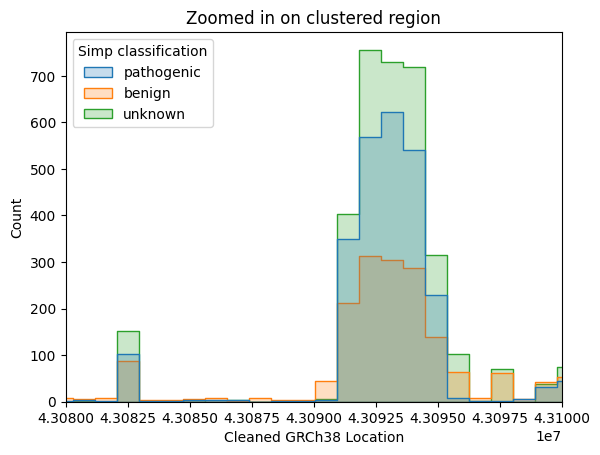

In [26]:
#Zooming into clustered region
sns.histplot(
    data=simp_df[simp_df['Simp classification'].isin(['pathogenic', 'benign', 'unknown'])],
    x='Cleaned GRCh38 Location', hue='Simp classification',
    bins=100, element='step', common_norm=False
)
plt.xlim(4.308e7, 4.31e7)
plt.xlabel('Cleaned GRCh38 Location')
plt.ylabel('Count')
plt.title('Zoomed in on clustered region')
plt.show()

In [27]:
#Making new column for in clustered region
simp_df['Clustered'] = (simp_df['Cleaned GRCh38 Location'] >= 4.309e7) & (simp_df['Cleaned GRCh38 Location'] <= 4.31e7)
simp_df['Clustered'].value_counts()

,count
Clustered,
True,7141
False,5540


In [28]:
#Add a clustered column to the likely_benign_df and show whether the likely benign variants are in the clustered region
likely_benign_df['Cleaned GRCh38 Location'] = likely_benign_df['GRCh38Location'].apply(parse_location)
likely_benign_df['Cleaned GRCh38 Location'] = pd.to_numeric(likely_benign_df['Cleaned GRCh38 Location'], errors='coerce')
selected_cols = likely_benign_df[['dbSNP ID','Germline year last evaluated', 'Cleaned GRCh38 Location']]
selected_cols['Clustered'] = (selected_cols['Cleaned GRCh38 Location'] >= 4.309e7) & (selected_cols['Cleaned GRCh38 Location'] <= 4.31e7)
print(selected_cols)

           dbSNP ID  Germline year last evaluated  Cleaned GRCh38 Location  \
1522    rs273901763                          1998               43050985.0   
1524     rs80358190                          1999               43051032.0   
1926    rs273901758                          1999               43056975.0   
1927    rs273901758                          2005               43056975.0   
1928    rs273901757                          2002               43056991.5   
1931    rs273901756                          2006               43057003.5   
2399    rs273901749                          2010               43063232.0   
2459    rs273901750                          1999               43063320.0   
2491   rs1567768553                          1998               43063329.0   
2759    rs273901747                          1999               43063415.0   
2761    rs273901748                          1999               43063439.0   
3631   rs1555580027                          2010               

/tmp/ipython-input-2022374581.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_cols['Clustered'] = (selected_cols['Cleaned GRCh38 Location'] >= 4.309e7) & (selected_cols['Cleaned GRCh38 Location'] <= 4.31e7)
